##**Importing Dependencies**

In [1]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

##**Downloading Data**

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 135086952.09it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 118993805.33it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30532388.84it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7872119.33it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [5]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [6]:
train_data.targets.size()

torch.Size([60000])

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

##**Converting Data into Batches**

In [8]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1),
    'test': DataLoader(test_data,
                       batch_size = 100,
                       shuffle = True,
                       num_workers = 1)
}

In [9]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x79d6dcaf4c10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x79d6dcaf48e0>}

##**Building Neural Networks**

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.conv2_drop = nn.Dropout()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training = self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train epoch: {epoch} [{batch_idx * len(data)} / {len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss = loss_fn(output, target).item()
      pred = output.argmax(dim = 1, keepdim = True)
      correct = pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f'\nTest set: Average Loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

In [23]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-10-42f3f7272d79>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train epoch: 1 [0 / 60000 (0%)]	2.303294
Train epoch: 1 [2000 / 60000 (3%)]	2.280870
Train epoch: 1 [4000 / 60000 (7%)]	2.118371
Train epoch: 1 [6000 / 60000 (10%)]	2.022578
Train epoch: 1 [8000 / 60000 (13%)]	1.872206
Train epoch: 1 [10000 / 60000 (17%)]	1.826333
Train epoch: 1 [12000 / 60000 (20%)]	1.753548
Train epoch: 1 [14000 / 60000 (23%)]	1.712250
Train epoch: 1 [16000 / 60000 (27%)]	1.682859
Train epoch: 1 [18000 / 60000 (30%)]	1.641972
Train epoch: 1 [20000 / 60000 (33%)]	1.690999
Train epoch: 1 [22000 / 60000 (37%)]	1.602963
Train epoch: 1 [24000 / 60000 (40%)]	1.633030
Train epoch: 1 [26000 / 60000 (43%)]	1.643385
Train epoch: 1 [28000 / 60000 (47%)]	1.645587
Train epoch: 1 [30000 / 60000 (50%)]	1.721786
Train epoch: 1 [32000 / 60000 (53%)]	1.660494
Train epoch: 1 [34000 / 60000 (57%)]	1.626354
Train epoch: 1 [36000 / 60000 (60%)]	1.589863
Train epoch: 1 [38000 / 60000 (63%)]	1.616314
Train epoch: 1 [40000 / 60000 (67%)]	1.609763
Train epoch: 1 [42000 / 60000 (70%)]	1.537550

<ipython-input-10-42f3f7272d79>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 0


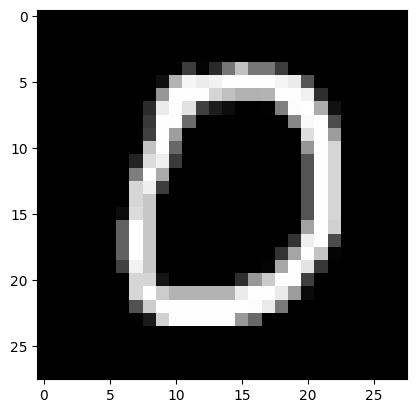

In [29]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[10]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim = 1, keepdim = True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap = 'gray')
plt.show()

<ipython-input-10-42f3f7272d79>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


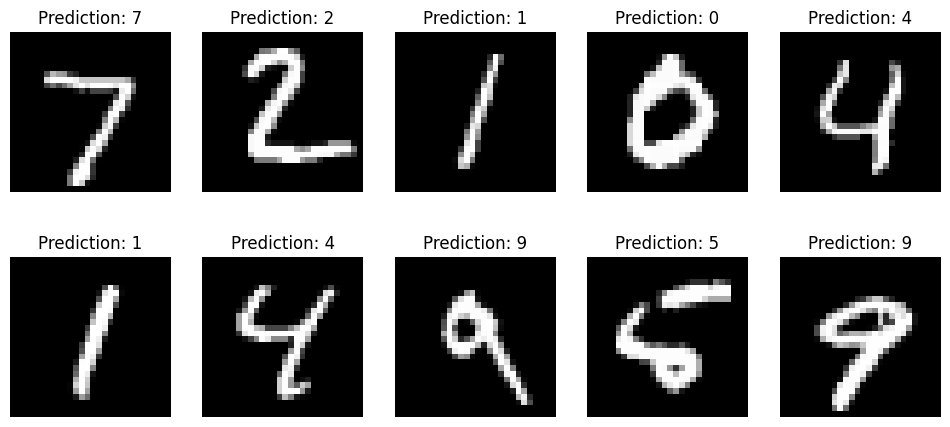

In [31]:
import matplotlib.pyplot as plt

model.eval()

# Number of rows and columns for the grid
num_rows = 2
num_columns = 5

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 5))

for i in range(min(num_rows * num_columns, len(test_data))):
    row = i // num_columns
    col = i % num_columns

    data, target = test_data[i]
    data = data.unsqueeze(0).to(device)
    output = model(data)
    prediction = output.argmax(dim=1, keepdim=True).item()

    image = data.squeeze(0).squeeze(0).cpu().numpy()

    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(f'Prediction: {prediction}')
    axs[row, col].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()
